# The two-Stream Instability Model


gros blabla



<IPython.core.display.Javascript object>


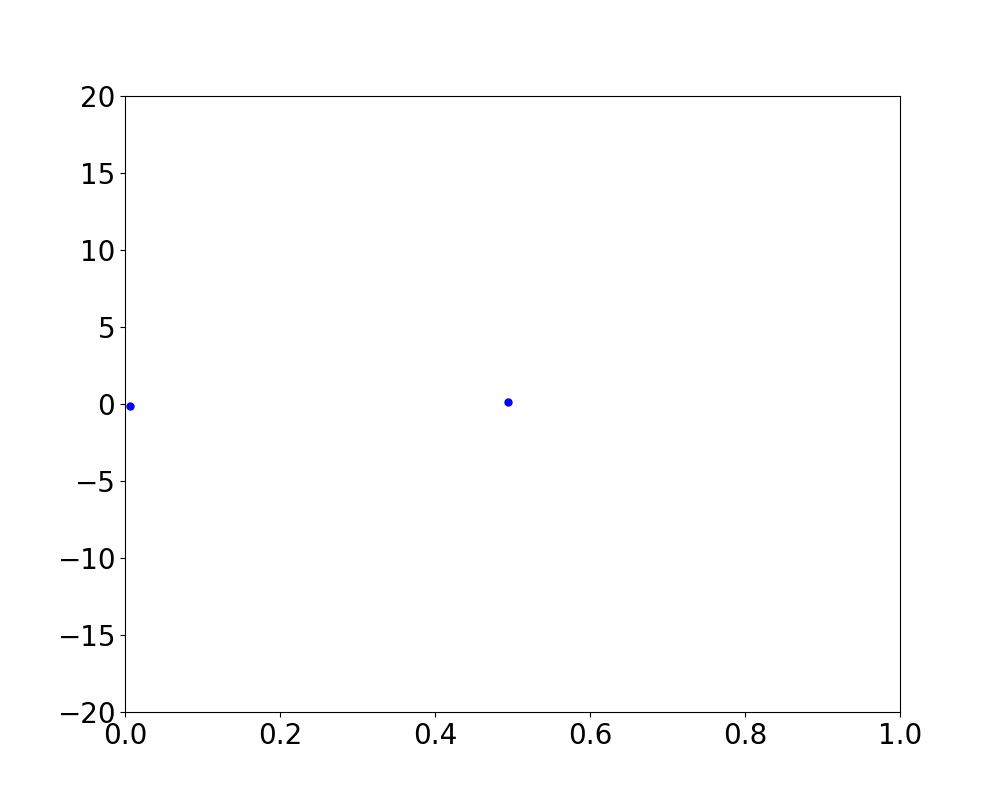

In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# make sure labels are large enough in report
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0


#temp_range = np.hstack([np.arange(0.5,2.,0.5), np.arange(2.,2.5,0.05), np.arange(2.5,5,0.5)])

L = 10

pos = np.loadtxt("../results/position.dat")
vel = np.loadtxt("../results/speed.dat")
T = pos.shape[0]
#pos = np.random.rand(1000,100)
#vel = np.random.rand(1000,100)

fig = plt.figure()
#plt.legend()
ax = fig.add_subplot(111)
line, = ax.plot([], [], 'bo', ms=5)
ax.set_xlim(0, 1)
ax.set_ylim(-20, 20)

def make_frame(t):
    X = pos[t%T,:]
    V = vel[t%T,:]
    line.set_data(X, V)
    return line,

animation.FuncAnimation(fig, make_frame, interval=10)





In [9]:
print(vel)

[  0.00000000e+00   6.93889390e-16   1.38777878e-15   2.08166817e-15
   2.77555756e-15   3.46944695e-15   4.16333634e-15   4.85722573e-15
   5.55111512e-15   6.24500451e-15   5.70445543e-15   5.31724666e-15
   4.93003789e-15   4.54282912e-15   4.15562035e-15   3.76841158e-15
   3.38120281e-15   2.99399404e-15   2.60678527e-15   2.21957650e-15
   1.83236773e-15   1.44515895e-15   1.05795018e-15   6.70741413e-16
   2.83532642e-16  -1.03676128e-16  -4.90884899e-16  -8.78093670e-16
  -1.26530244e-15  -1.65251121e-15  -2.03971998e-15  -2.42692875e-15
  -2.81413752e-15  -3.20134629e-15  -3.58855507e-15  -3.97576384e-15
  -4.36297261e-15  -4.75018138e-15  -5.13739015e-15  -5.52459892e-15
  -5.91180769e-15  -6.45235677e-15  -5.75846738e-15  -5.48819284e-15
  -4.25375437e-15  -4.83070953e-15  -3.05572198e-15  -3.78601745e-15
  -2.16437020e-15  -9.66337813e-16   2.31694578e-16   1.42972697e-15
   2.62775936e-15   3.82579175e-15   5.44743899e-15   4.71714352e-15
   6.49213108e-15   5.91517592e-15